# 0. Preprocess Data

In [2]:
import geopandas as gpd

In [17]:
filename = "./Data/General_Land_Use_Final_Dataset.geojson"
file = open(filename)
gdf = gpd.read_file(file)

In [3]:
gdf.head()

,OBJECTID,MASTER_CAT,SUB_CAT,URB,CITY_NM,AUPolyID,NAME,LUCodeID,JoinID,FID,...,PCTNEW_16_,PCT_NEW_17,HU_2017_Density,Acres,NEW_HU_17_Density,NEW_00_17_Density,Shape__Area,Shape__Length,GlobalID,geometry
0,1,Undesignated,Undesignated,,,,Mason,2,None,0,...,0.000000,0.000000,0.000000,0.000002,0.000000,0.000000,6.597900e-02,3.128234e+01,4c56ccb7-57d3-4722-8b6b-44a97d4baee0,None
1,2,Undesignated,Undesignated,,,,Mason,3,None,1,...,0.000000,0.000000,0.000000,191.430601,0.000000,0.000000,8.338683e+06,2.966529e+05,c37833a6-27ca-442c-a43f-fa7e99066352,"MULTIPOLYGON (((-123.21720 47.08491, -123.2153..."
2,3,Agricultural Area,Primary Agricultural Area,,,,Mason,4,None,2,...,0.000000,0.000000,0.012989,615.896643,0.000000,0.001624,2.682835e+07,1.269735e+05,fee71d64-d671-448b-ba30-c6953a036b49,"MULTIPOLYGON (((-123.08142 47.09216, -123.0814..."
3,4,Tribal,Tribal Inholding Lands,,,,Mason,5,None,3,...,0.013196,0.002903,0.109809,6292.763714,0.000318,0.027969,2.741115e+08,9.800588e+05,db8f9366-7822-44e4-8d4a-f1a60341a2d6,"POLYGON ((-123.42936 47.31595, -123.43451 47.3..."
4,5,Forest Lands,Primary Forest Area,,,,Mason,6,None,4,...,0.016393,0.010870,0.001892,98297.534174,0.000020,0.000346,4.281824e+09,2.550548e+06,16b46e92-682c-4a56-a6dd-2930ea9b5e1c,"POLYGON ((-123.12341 47.43258, -123.12314 47.4..."


In [4]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
gdf.columns

Index(['OBJECTID', 'MASTER_CAT', 'SUB_CAT', 'URB', 'CITY_NM', 'AUPolyID',
       'NAME', 'LUCodeID', 'JoinID', 'FID', 'URB_1', 'CITY_NM_1', 'AUPolyID_1',
       'NAME_1', 'LUCodeID_1', 'SubCID', 'HU_2000', 'HU_2001', 'HU_2002',
       'HU_2003', 'HU_2004', 'HU_2005', 'HU_2006', 'HU_2007', 'HU_2008',
       'HU_2009', 'HU_2010', 'HU_2011', 'HU_2012', 'HU_2013', 'HU_2014',
       'HU_2015', 'HU_2016', 'HU_2017', 'NEW_HU_00_', 'PCT_NEW_00',
       'NEW_HU_10_', 'PCT_NEW_01', 'NEW_HU_01', 'NEW_HU_02', 'NEW_HU_03',
       'NEW_HU_04', 'NEW_HU_05', 'NEW_HU_06', 'NEW_HU_07', 'NEW_HU_08',
       'NEW_HU_09', 'NEW_HU_10', 'NEW_HU_11', 'NEW_HU_12', 'NEW_HU_13',
       'NEW_HU_14', 'NEW_HU_15', 'NEW_HU_16', 'NEW_HU_17', 'NEW_00_17',
       'PCT_NEW_02', 'NEW_00_05', 'NEW_06_10', 'NEW_11_15', 'NEW_16_17',
       'NEW_17', 'PCTNEW_00_', 'PCT_NEW_06', 'PCTNEW_11_', 'PCTNEW_16_',
       'PCT_NEW_17', 'HU_2017_Density', 'Acres', 'NEW_HU_17_Density',
       'NEW_00_17_Density', 'Shape__Area', 'Shape__L

In [8]:
king = ['Algona','Auburn','Beaux Arts Village','Bellevue','Black Diamond','Bothell','Burien','Carnation','Clyde Hill',
        'Covington','Des Moines','Duvall','Enumclaw','Federal Way','Hunts Point','Issaquah','Kenmore','Kent','Kirkland',
        'Lake Forest Park','Maple Valley','Medina','Mercer Island','Milton','Newcastle','Normandy Park','North Bend',
        'Pacific','Redmond','Renton','Sammamish','SeaTac','Seattle','Shoreline','Skykomish','Snoqualmie','Tukwila',
        'Woodinville','Yarrow Point']

In [13]:
kin_gdf = gdf[gdf['CITY_NM'].isin(king)]

In [15]:
kin_gdf.to_file('./Data/king_gdf.geojson', driver="GeoJSON")  

## 1. Load filtered data

In [104]:
filename = "./Data/king_gdf.geojson"
file = open(filename)
king_gdf = gpd.read_file(file)

<Axes: >

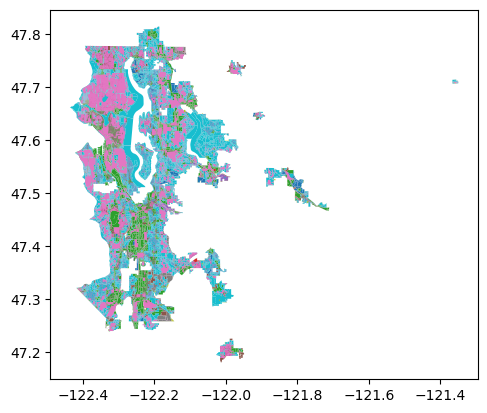

In [3]:
king_gdf.plot(column='MASTER_CAT')

In [6]:
king_gdf['MASTER_CAT'].value_counts()

MASTER_CAT
Intensive Urban                          1877
Urban Character Residential              1429
ROW                                       753
PROW                                      717
Undesignated                              381
Industrial                                281
Water                                     260
Rural Character Residential               116
Active Open Space and Recreation          107
Public                                     78
Natural Preservation and Conservation      25
Agricultural Area                          20
Mineral Resource Area                       8
Forest Lands                                5
Tribal                                      1
Name: count, dtype: int64

In [22]:
king_gdf['SUB_CAT'].value_counts()

SUB_CAT
Traditional Single Family Residential (3.1-12 Units/Acre)               1144
Commercial/Office                                                        917
ROW                                                                      753
PROW                                                                     717
Residential (12+ Units/Acre)                                             632
Undesignated                                                             381
Mixed Use                                                                291
Water                                                                    260
Low Density Urban Residential (1.1-3 Units/Acre)                         222
Light Industrial                                                         144
Heavy Industrial                                                         117
Active Open Space and Recreation                                         107
Public                                                              

# 2. Censys Data

In [6]:
import numpy as np
import pandas as pd
import censusdata
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import fiona

In [7]:
def get_census_tract_geom(state_fips, county_fips):

    # find state and county fips here: https://www.census.gov/geographies/reference-files/2017/demo/popest/2017-fips.html
    
    # Download the census tract shapefiles
    tracts = gpd.read_file(f'https://www2.census.gov/geo/tiger/TIGER2019/TRACT/tl_2019_{state_fips}_tract.zip')

    # set index as tract
    tracts = tracts.rename(columns={'TRACTCE':'Tract'}).set_index('Tract')

    # Filter to only King County
    tracts = tracts[tracts['COUNTYFP'] == county_fips]
    tracts = tracts[['geometry']]

    return tracts

In [8]:
# Define the state and county for Seattle
state_fips = '53'  # FIPS code for Washington
county_fips = '033'  # FIPS code for King County

In [98]:
# get tracts geometry
tract_geom_gdf = get_census_tract_geom(state_fips, county_fips).to_crs('EPSG:4326') 
tract_geom_gdf = gpd.GeoDataFrame(tract_geom_gdf, geometry=tract_geom_gdf['geometry'],crs='EPSG:4326')
tract_geom_gdf.head()

,geometry
Tract,
025701,"POLYGON ((-122.20643 47.46968, -122.20642 47.4..."
025702,"POLYGON ((-122.18587 47.46643, -122.18581 47.4..."
025804,"POLYGON ((-122.18595 47.45700, -122.18593 47.4..."
026001,"POLYGON ((-122.24963 47.49934, -122.24951 47.4..."
026100,"POLYGON ((-122.27058 47.49558, -122.27030 47.4..."


# 3. Overlay Census on land-use plot

<Axes: >

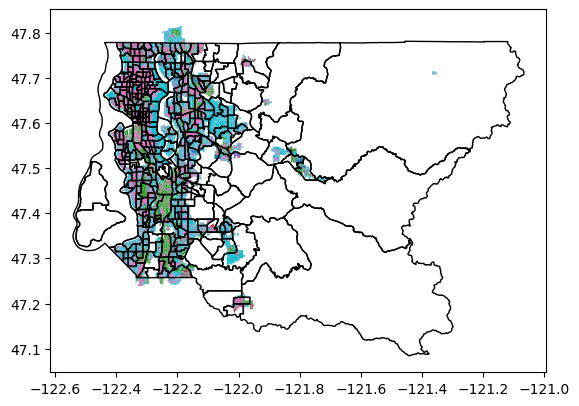

In [10]:
f, ax_overlay = plt.subplots()
king_gdf.plot(ax=ax_overlay,column='MASTER_CAT')
tract_geom_gdf.plot(ax=ax_overlay, facecolor='none', edgecolor='k')

(47.4, 47.5)

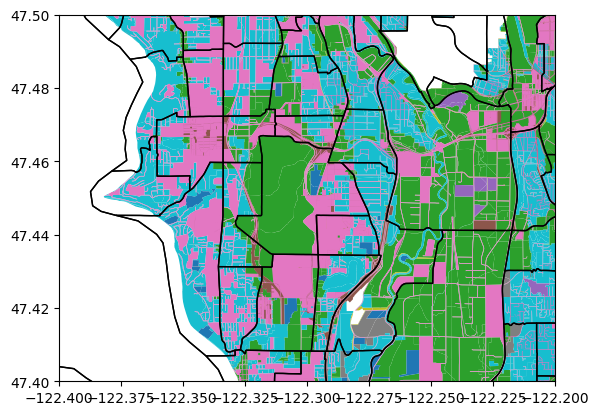

In [14]:
# Zoom
f, ax_overlay = plt.subplots()
king_gdf.plot(ax=ax_overlay,column='MASTER_CAT')
tract_geom_gdf.plot(ax=ax_overlay, facecolor='none', edgecolor='k')
ax_overlay.set_xlim(-122.4,-122.2)
ax_overlay.set_ylim(47.4,47.5)

# 4. Clip

In [181]:
#gpd.clip(king_gdf,tract_geom_gdf) is not working

### Delete 'ROW' and 'PROW' as they are too small

In [243]:
discard = ['ROW','PROW','Water']

In [244]:
king_gdf = king_gdf[~king_gdf['MASTER_CAT'].isin(discard)]

(47.4, 47.5)

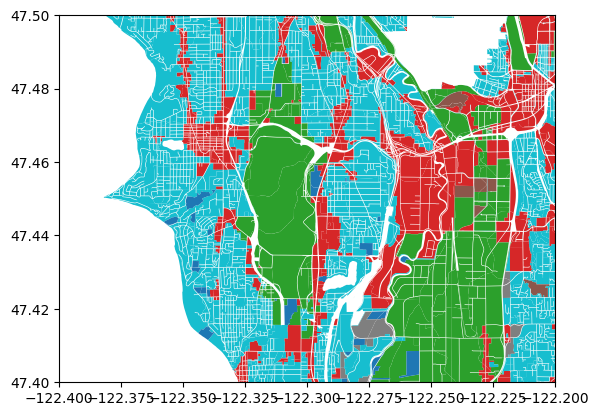

In [245]:
f, ax_clip = plt.subplots()
king_gdf.plot(ax=ax_clip,column='MASTER_CAT')
ax_clip.set_xlim(-122.4,-122.2)
ax_clip.set_ylim(47.4,47.5)

### Find centroid of each land use area

In [246]:
king_gdf['centroid'] = king_gdf.centroid

C:\Users\Nutvara\AppData\Local\Temp\ipykernel_31540\546739704.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  king_gdf['centroid'] = king_gdf.centroid
C:\Users\Nutvara\miniconda3\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [247]:
king_gdf = king_gdf[~king_gdf['geometry'].isna()]

(47.4, 47.5)

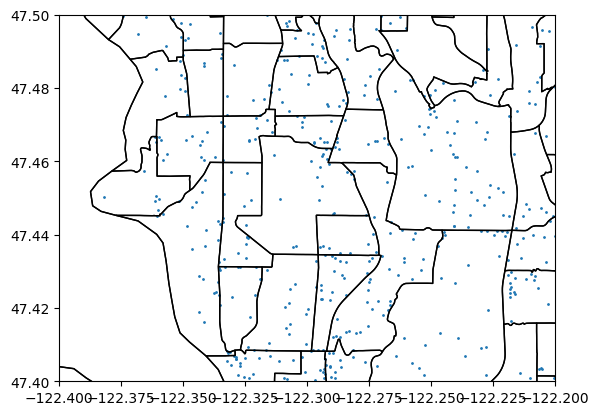

In [248]:
f, ax_clip = plt.subplots()
king_gdf['centroid'].plot(ax=ax_clip,markersize=1)
tract_geom_gdf.plot(ax=ax_clip, facecolor='none', edgecolor='k')
ax_clip.set_xlim(-122.4,-122.2)
ax_clip.set_ylim(47.4,47.5)

### Calculate area for each land-use polygon

In [249]:
king_gdf['area'] = king_gdf['geometry'].area

C:\Users\Nutvara\AppData\Local\Temp\ipykernel_31540\2931238466.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  king_gdf['area'] = king_gdf['geometry'].area


(47.4, 47.5)

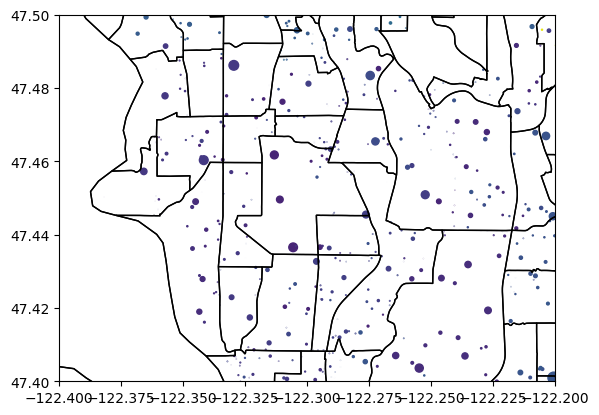

In [250]:
f, ax_clip = plt.subplots()
king_gdf['centroid'].plot(ax=ax_clip,markersize=king_gdf['area']*10E4,c=king_gdf['MASTER_CAT'], cmap='viridis')
tract_geom_gdf.plot(ax=ax_clip, facecolor='none', edgecolor='k')
ax_clip.set_xlim(-122.4,-122.2)
ax_clip.set_ylim(47.4,47.5)

<Axes: >

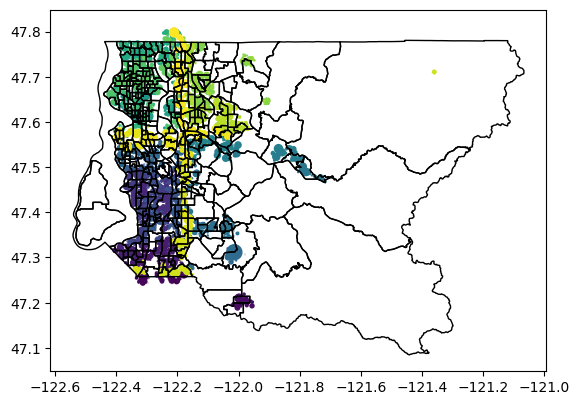

In [266]:
f, ax_clip = plt.subplots()
king_gdf['centroid'].plot(ax=ax_clip,markersize=king_gdf['area']*10E4,c=king_gdf['MASTER_CAT'], cmap='viridis')
tract_geom_gdf.plot(ax=ax_clip, facecolor='none', edgecolor='k')

### Clip point with Census polygon, find maximum area as the representative

Test with one census #025701

In [252]:
c025701 = king_gdf[king_gdf['centroid'].within(tract_geom_gdf.at['025701','geometry'])]
c025701

,OBJECTID,MASTER_CAT,SUB_CAT,URB,CITY_NM,AUPolyID,NAME,LUCodeID,JoinID,FID,...,HU_2017_Density,Acres,NEW_HU_17_Density,NEW_00_17_Density,Shape__Area,Shape__Length,GlobalID,geometry,centroid,area
660,14278,Intensive Urban,Mixed Use,Urban,Renton,8047,King,14279,None,14277,...,4.505415,51.937499,0.000000,0.481348,2.262388e+06,13291.018438,244ebe32-66bb-44ce-8d3b-39e80fc3e16a,"MULTIPOLYGON (((-122.18405 47.47661, -122.1841...",POINT (-122.19277 47.47976),2.507993e-05
661,14279,Intensive Urban,Mixed Use,Urban,Renton,8127,King,14280,None,14278,...,0.000000,0.039096,0.000000,0.000000,1.703036e+03,304.962821,9b620e12-07fa-4e88-8a3c-1b02b0d6e5ce,"MULTIPOLYGON (((-122.19950 47.48056, -122.1995...",POINT (-122.19949 47.48056),1.887946e-08
1621,15358,Urban Character Residential,Traditional Single Family Residential (3.1-12 ...,Urban,Renton,9037,King,15359,None,15357,...,3.771118,581.525125,0.013757,-0.668931,2.533114e+07,239215.505327,dd11b22c-e386-450c-b595-17ba563c40f8,"MULTIPOLYGON (((-122.22664 47.48798, -122.2266...",POINT (-122.20374 47.46692),2.807523e-04
1627,15369,Natural Preservation and Conservation,Natural Preservation and Conservation,Urban,Renton,8127,King,15370,None,15368,...,0.000000,0.502304,0.000000,0.000000,2.188026e+04,643.849219,185ebea7-33ec-47b6-84c0-9c38899c600a,"POLYGON ((-122.19954 47.48043, -122.19969 47.4...",POINT (-122.19992 47.48016),2.425577e-07
5682,45028,Urban Character Residential,Traditional Single Family Residential (3.1-12 ...,Urban,Renton,8047,King,45029,None,45027,...,4.471508,876.661658,0.012548,0.881754,3.818723e+07,374615.372865,aa818938-86ba-486e-984a-461d08c04a58,"MULTIPOLYGON (((-122.16005 47.50018, -122.1600...",POINT (-122.17345 47.47157),4.232658e-04


In [253]:
max_area_row = c025701[c025701['area'] == c025701['area'].max()]
max_area_row['MASTER_CAT']
# So the Census 025701 land use type is 'Urban Character Residential'

5682    Urban Character Residential
Name: MASTER_CAT, dtype: object

### Loop for each census

In [254]:
tract_list = tract_geom_gdf.index.to_list()

In [255]:
land_use_type = []
for t in tract_list:
    temp = king_gdf[king_gdf['centroid'].within(tract_geom_gdf.at[t,'geometry'])]
    temp_max = temp[temp['area'] == temp['area'].max()]
    try:
        land_type = temp_max['MASTER_CAT'].values[0]
    except IndexError:
        land_type = 'N/A'
    land_use_type.append(land_type)

In [256]:
tract_geom_gdf['land_use'] = land_use_type

In [257]:
tract_geom_gdf

,geometry,land_use
Tract,,
025701,"POLYGON ((-122.20643 47.46968, -122.20642 47.4...",Urban Character Residential
025702,"POLYGON ((-122.18587 47.46643, -122.18581 47.4...",Natural Preservation and Conservation
025804,"POLYGON ((-122.18595 47.45700, -122.18593 47.4...",Urban Character Residential
026001,"POLYGON ((-122.24963 47.49934, -122.24951 47.4...",Undesignated
026100,"POLYGON ((-122.27058 47.49558, -122.27030 47.4...",Intensive Urban
...,...,...
002400,"POLYGON ((-122.29602 47.69023, -122.29504 47.6...",Intensive Urban
002600,"POLYGON ((-122.31759 47.68855, -122.31627 47.6...",Intensive Urban
002900,"POLYGON ((-122.36604 47.68178, -122.36598 47.6...",N/A


<Axes: >

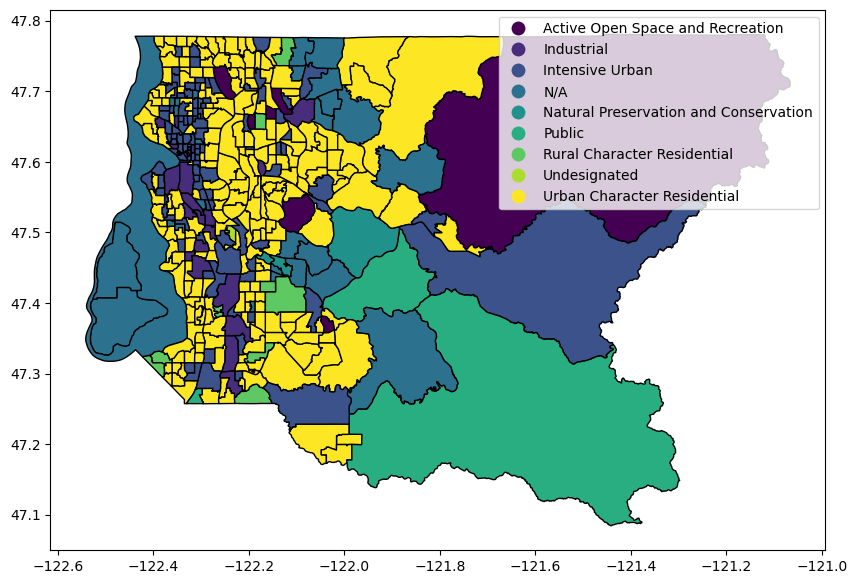

In [274]:
f, ax_land_use = plt.subplots(figsize=(10,10))
tract_geom_gdf.plot(ax=ax_land_use, column='land_use', edgecolor='k', legend=True,cmap='viridis')

# 5. Export file

In [275]:
tract_geom_gdf.to_file('tract_landuse_gdf', driver='GeoJSON')

In [3]:
filename = "./tract_landuse_gdf"
file = open(filename)
tract_landuse_gdf = gpd.read_file(file)

In [4]:
tract_landuse_gdf

,Tract,land_use,geometry
0,025701,Urban Character Residential,"POLYGON ((-122.20643 47.46968, -122.20642 47.4..."
1,025702,Natural Preservation and Conservation,"POLYGON ((-122.18587 47.46643, -122.18581 47.4..."
2,025804,Urban Character Residential,"POLYGON ((-122.18595 47.45700, -122.18593 47.4..."
3,026001,Undesignated,"POLYGON ((-122.24963 47.49934, -122.24951 47.4..."
4,026100,Intensive Urban,"POLYGON ((-122.27058 47.49558, -122.27030 47.4..."
...,...,...,...
393,002400,Intensive Urban,"POLYGON ((-122.29602 47.69023, -122.29504 47.6..."
394,002600,Intensive Urban,"POLYGON ((-122.31759 47.68855, -122.31627 47.6..."
395,002900,N/A,"POLYGON ((-122.36604 47.68178, -122.36598 47.6..."
396,009400,Intensive Urban,"POLYGON ((-122.31732 47.59435, -122.31695 47.5..."
